In [32]:
from cleaned import ratings_df
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#? Train and Test split
X = ratings_df[['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes', 'Day_Rated',
             'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
             'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
             'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Reality-TV',
             'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western',
             'movie', 'tvMiniSeries', 'tvMovie', 'tvSeries', 'video', 'videoGame']]
y = ratings_df['Your Rating']


# Handle missing values if any (imputation or dropping) - #? Check if this needs to be done?
X = X.dropna()
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# print(y_pred) -- minteresting..

In [37]:
#? Evaluation 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred) #* Can use either this one represents the mean diff betwen predicted an actual - makes intuitive sense!
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

#! Extra crap 
print(model.coef_)
print(model.intercept_)
print(model.score(X_train, y_train)) #* --- This is good (R^2 best possilbe val = 1, usually 0.7 is good, basically the percentage variation in y explained by all X variable together!
print(model.score(X_test, y_test)) #* Basically both these are crap (Because a lot of these relationships aren't linear!!)
#? Score on train = how well model is trained on data / fits
#? Score on test = Model's performance ond data it hasn't seen b4 (crucial for asessing accuracy on new instances!)

Mean Squared Error: 1.1875774046590188
Mean Absolute Error: 0.8763388346162722
[ 6.56401233e-01  1.83700364e-04  3.24797240e-02  6.20105401e-07
 -5.13755721e-05  2.11485110e-01 -1.44468725e-01 -7.30477042e-03
 -5.40551656e-01 -3.59453781e-02  2.40623234e-02  1.88293385e-01
 -1.09338404e-01 -2.66371117e-01 -3.67626310e-01 -6.54788787e-01
  7.90381189e-04 -3.46713940e-01  4.90106363e-02 -5.94262843e-01
 -5.51303380e-02 -6.54788787e-01  4.95474661e-02 -1.37154311e-02
  2.82954132e-01  8.25036286e-01 -1.80129840e-01  1.28974059e-01
 -1.19779422e-01  2.36049095e-01  2.21964063e-01 -5.19000012e-01
  2.38109374e-01 -1.77122520e-01  0.00000000e+00]
-64.46679938081073
0.3961196201974926
0.33474863523339293


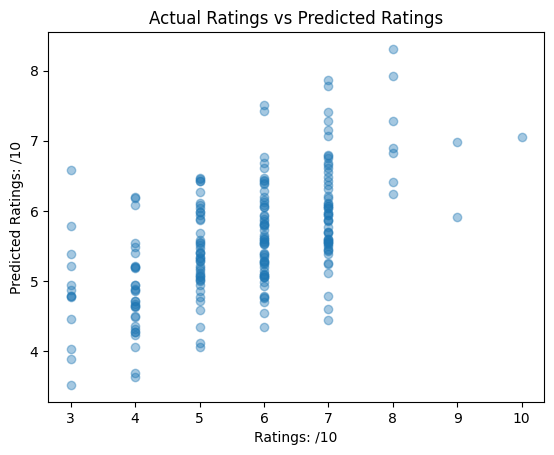

In [38]:

#? New stuff) Visualizing results with matplotlib
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Ratings: /10")
plt.ylabel("Predicted Ratings: /10")
plt.title("Actual Ratings vs Predicted Ratings")
plt.show() #* My Graph looks weird because My actual ratings are all whole numbers.. :(



In [39]:

#? More visualizations
#* Let your boy build a lit function to view all the graphs and therefor correlations! (this is pretty lit!!)
def scatter_loop(df, var_list):
    for variable in var_list:
        plt.scatter(df[[variable]], df["Your Rating"], alpha = 0.4)
        plt.xlabel(variable)
        plt.show()
    return ""

# print(scatter_loop(ratings_df, X)) #* comment this out for a sec

#! Runtime need to do z-score standardise/ normalize rather than min-max due to massive outliers!